# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


/home/fredi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [4]:
# Define the col names for the iris dataset
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]


# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [7]:
dataset.shape

(150, 5)

2. Drop rows with any missing values


In [8]:
# Drop na
dataset = dataset.dropna()

print(dataset.shape)


(150, 5)


3. Encoding the class label categorical column: from string to num


In [9]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

/tmp/ipykernel_20833/790171681.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

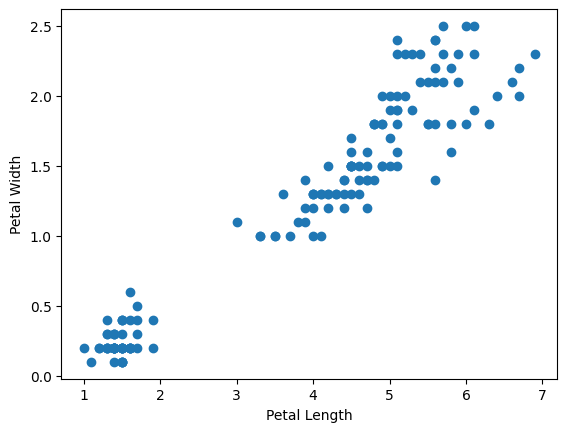

In [10]:
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


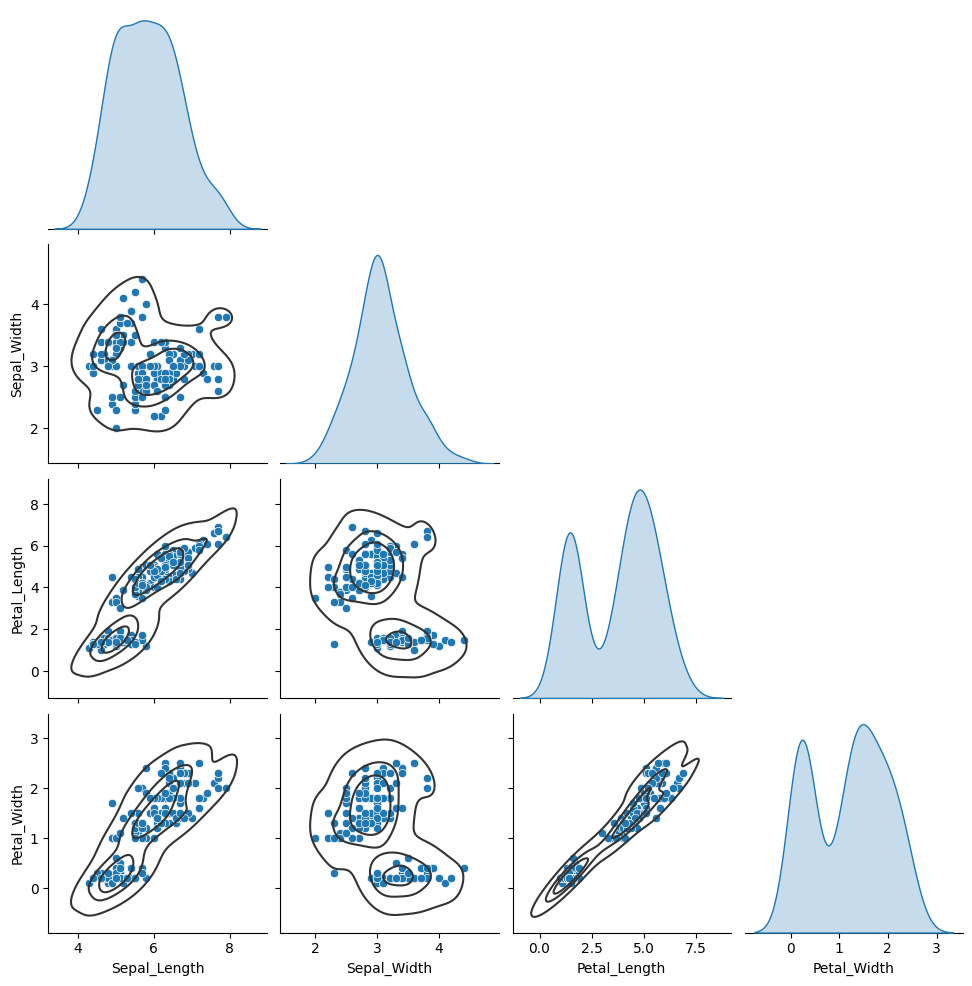

In [11]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

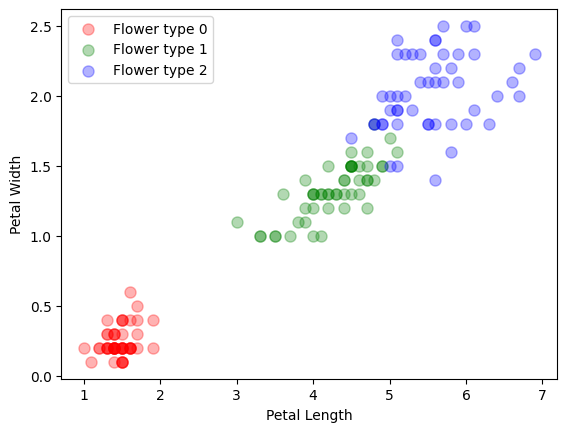

In [12]:
# Get dataframes for each real cluster

df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()




Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [34]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define number of clusters
n_clusters = 3 #for 3 species of iris
# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(dataset.drop(columns='Flower'))  # Exclude the 'Flower' column (target variable)
# Print estimated cluster of each point in the dataset
print("Estimated cluster labels for each point:")
kmeans.labels_

Estimated cluster labels for each point:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [38]:
# Manual pairing the labels of the real and estimated clusters
# Confusion matrix to compare real labels and cluster labels
conf_matrix = confusion_matrix(dataset['Flower'], kmeans.labels_)
print(f"Confution Matrix:\n {conf_matrix}")

# Find the best cluster to label mapping (manually, by finding the mode)
# Matching clusters to real labels (assuming each cluster corresponds to a class)
labels_mapping = {}
for i in range(n_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    true_labels_for_cluster = dataset['Flower'].iloc[cluster_indices]
    # Find the most common true label for each cluster
    most_common_label = true_labels_for_cluster.mode()[0]
    labels_mapping[i] = most_common_label

Confution Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


In [17]:
# Add a new column to the dataset with the cluster information

dataset['Estimated_Cluster'] = [labels_mapping[label] for label in kmeans.labels_]

In [18]:
# Label of the estimated clusters
print("Cluster labels (Estimated) for each data point:")
print(dataset[['Flower', 'Estimated_Cluster']])

Cluster labels (Estimated) for each data point:
     Flower  Estimated_Cluster
0         0                  0
1         0                  0
2         0                  0
3         0                  0
4         0                  0
..      ...                ...
145       2                  2
146       2                  1
147       2                  2
148       2                  2
149       2                  1

[150 rows x 2 columns]


In [19]:
# Cluster centroides
print("Cluster centroids:")
print(kmeans.cluster_centers_)


Cluster centroids:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [20]:
# Sum of squared error (sse) of the final model
print(f"\nSum of squared errors (SSE): {kmeans.inertia_}")


Sum of squared errors (SSE): 78.94506582597731


In [21]:
# The number of iterations required to converge
print(f"\nNumber of iterations to converge: {kmeans.n_iter_}")



Number of iterations to converge: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

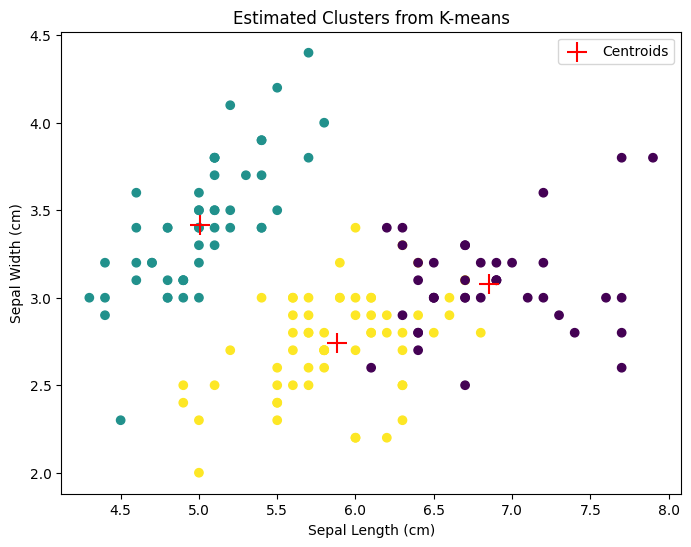

In [40]:
# Plot estimated clusters (using 'sepal length' and 'sepal width' for visualization)
plt.figure(figsize=(8, 6))

# Plot points, color them by their estimated cluster
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')

# Plot centroids (cluster centers) with a different marker (e.g., red stars)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='+', label='Centroids')

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Estimated Clusters from K-means')
plt.legend()

# Show plot
plt.show()

## Plot both real and estimated clusters to check for errors

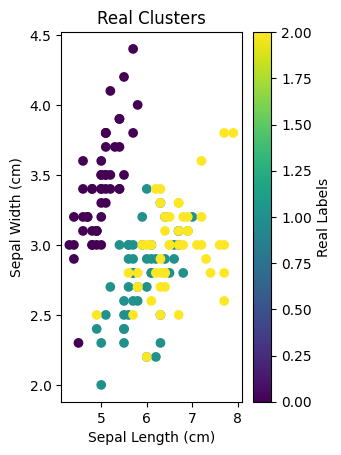

In [23]:
# Real Clusters
plt.subplot(1, 2, 1)
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=dataset['Flower'], cmap='viridis', marker='o')
plt.title('Real Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Real Labels')  # Color bar to indicate real labels


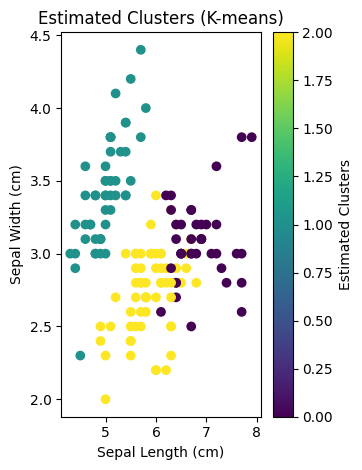

In [24]:
# Estimated Clusters
plt.subplot(1, 2, 2)
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Estimated Clusters (K-means)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Estimated Clusters')  # Color bar to indicate estimated clusters

# Show plot
plt.tight_layout()
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [29]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 11)

# For each k
# For each k, fit the model and compute the SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dataset.iloc[:, :-1])  # Exclude the 'Flower' column
    sse.append(kmeans.inertia_)  # Inertia = SSE



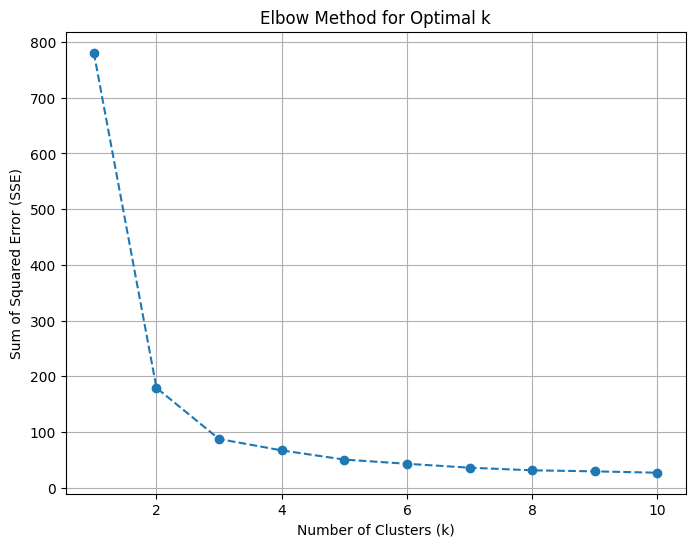

In [30]:
# Plot sse versus k
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Show plot
plt.show()

### Choose the k after which the sse is minimally reduced:


Visually we can see the elbow point is arround 3 (we can confirm this as we now there are 3 types of Iris, so 3 clusters)

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k